# CLUSTERING / NLP TECH ARTICLES NEW YORK TIMES


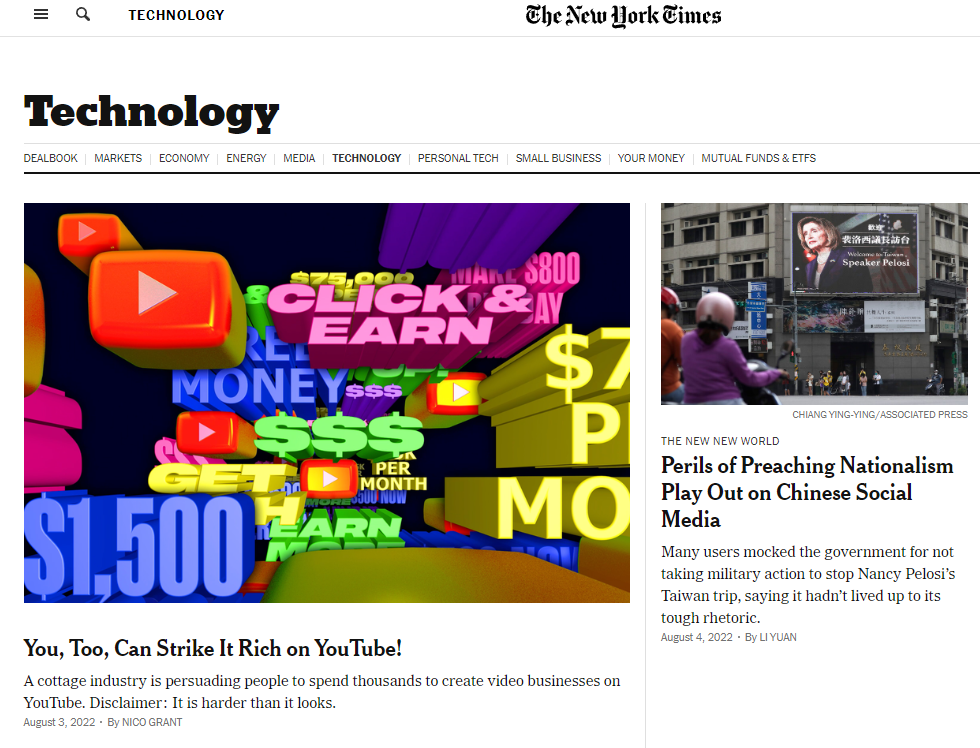

## EDA

In [1]:
import pandas as pd
df = pd.read_csv('TechArticles.csv')

In [2]:
df.head(5)

Unnamed: 0                                              title  \
0           0     Ty Haney Is Doing Things Differently This Time   
1           1  Washington State Advances Landmark Deal on Gig...   
2           2              Google Suspends Advertising in Russia   
3           3  When Electric Cars Rule the Road, They’ll Need...   
4           4  A coalition of state attorneys general opens a...   

                                            abstract  
0  The Outdoor Voices founder has a new venture t...  
1  Lawmakers have passed legislation granting ben...  
2  The move came after a Russian regulator demand...  
3  A wireless infrastructure company is betting i...  
4  The group is looking into the Chinese-owned vi...

In [3]:
df.drop("Unnamed: 0", inplace = True, axis = 1) #eliminamos esta columna sin valor

In [4]:
df.shape

(1200, 2)

In [5]:
df.dropna(axis =0, inplace=True) #eliminamos nans

In [6]:
df.shape

(1199, 2)

In [7]:
df.drop_duplicates(subset = ["abstract"], inplace = True) #eliminamos los duplicados

In [8]:
df.shape

(1012, 2)

In [9]:
indi = [] #buscamos los indices de los valroes qu queremos eliminar
for i in df["abstract"].values:
        if len(i) < 25:
            x = df[df['abstract']==i].index.values
            indi.append(x)
            
indis = []
for i in indi:
    indis.append(i[0])            
            

In [10]:
df.drop(indis,axis = 0, inplace = True) #eliminamos los resumens con solo 2 palabras

In [11]:
df.shape

(984, 2)

In [12]:
import re
import nltk

stopwords=nltk.corpus.stopwords.words("english")

In [13]:
articulo5 = [] #eliminamos las stopwords
articulo4 = []
for i in df["abstract"]:
    caps = []
    x = nltk.word_tokenize(i, 'english')
    for j in x:
        if j.lower() not in stopwords and len(j) > 2:
            
            caps.append(j)
    articulo5.append(nltk.Text(caps))
    articulo4.append(caps)

In [14]:
df["Stopwords"] = articulo5 

In [15]:
df["Stopwords"] = df["Stopwords"].map(lambda x : ' '.join(x))


In [16]:
df.head(5)

title  \
0     Ty Haney Is Doing Things Differently This Time   
1  Washington State Advances Landmark Deal on Gig...   
2              Google Suspends Advertising in Russia   
3  When Electric Cars Rule the Road, They’ll Need...   
4  A coalition of state attorneys general opens a...   

                                            abstract  \
0  The Outdoor Voices founder has a new venture t...   
1  Lawmakers have passed legislation granting ben...   
2  The move came after a Russian regulator demand...   
3  A wireless infrastructure company is betting i...   
4  The group is looking into the Chinese-owned vi...   

                                           Stopwords  
0  Outdoor Voices founder new venture aims reward...  
1  Lawmakers passed legislation granting benefits...  
2  move came Russian regulator demanded company s...  
3  wireless infrastructure company betting figure...  
4  group looking Chinese-owned video site harms m...

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

wc = WordCloud(background_color='white', max_words=len(df["Stopwords"].sum()))
wc.generate(df["Stopwords"].sum())

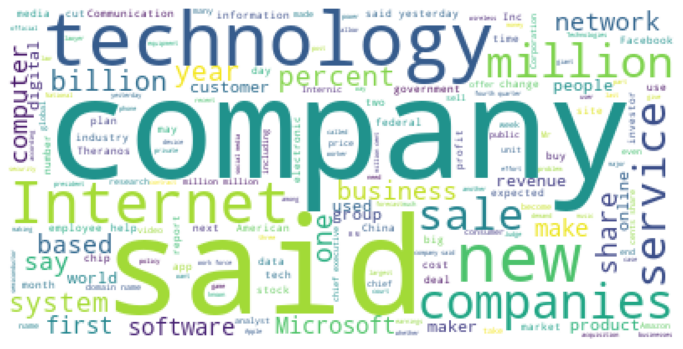

In [18]:
fig, ax = plt.subplots(figsize=(12,12)) #visualizamos las palabras que mas aparecen
ax.imshow(wc)
ax.axis('off')
plt.show()

In [19]:
tokens=nltk.word_tokenize(df["Stopwords"].sum(),"english") #creamos nuestra lista de tokens

In [20]:
palabras_total=len(tokens) #número de palabras
print(palabras_total)

20535


In [21]:
tokens_conjunto=set(tokens) #número de palabras únicas
palabras_diferentes=len(tokens_conjunto)
print(palabras_diferentes)

7658


In [22]:
def riqueza_lexica(tokens): 
    tokens_conjunto=set(tokens)
    palabras_totales=len(tokens) 
    palabras_diferentes=len(tokens_conjunto)
    riqueza_lexica=palabras_diferentes/palabras_totales
    return riqueza_lexica

In [23]:
riqueza_lexica(tokens)

0.37292427562697833

In [25]:
texto_nltk=nltk.Text(tokens) 
distribucion=nltk.FreqDist(texto_nltk) 
lista_frecuencias=distribucion.most_common() #Para ordenar la distribución de la frecuencia de palabras
print(lista_frecuencias[:10])

[('said', 245), ('company', 199), ('million', 143), ('percent', 108), ('would', 103), ('companies', 97), ('technology', 93), ('year', 78), ('new', 77), ('Internet', 71)]


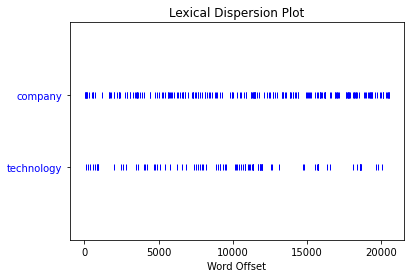

In [26]:
texto_nltk=nltk.Text(tokens) 

 
texto_nltk=nltk.Text(tokens) 
lista_palabras=["company",'technology'] 
texto_nltk.dispersion_plot(lista_palabras)

In [27]:
hapaxes=distribucion.hapaxes() #palabras que aparecen solo 1 vez

In [28]:
palabras_total

20535

In [29]:
len(hapaxes)

4926

In [30]:
minus_hapaxes =[]
for i in hapaxes:
    minus_hapaxes.append(i.lower())

In [31]:
articulo5 = [] #documentos sin stopwros ni hapaxes

for i in df["Stopwords"]:
    caps = []
    x = nltk.word_tokenize(i, 'english')
    for j in x:
        if j.lower() not in stopwords and j.lower() not in minus_hapaxes and len(j) > 2:
            
            caps.append(j)
    articulo5.append(nltk.Text(caps))

In [32]:
df["Hapaxes"] = articulo5
df["Hapaxes"] = df["Hapaxes"].map(lambda x : ' '.join(x))

In [33]:
y = df["Hapaxes"].map(lambda x : nltk.word_tokenize(x, "english")).values

In [35]:
print(list(df["Hapaxes"].values)[:10])

['founder new venture aims customers blockchain-based assets brand really want NFTs', 'passed legislation protections allowing Uber continue drivers contractors', 'move came Russian regulator demanded stop showing ads regulator claimed false Ukraine', 'wireless infrastructure betting figure charging wave new vehicles', 'looking video site harms pose', 'Investors give money developers Venture back founders without learning happens need', 'Google others warned must new law would make Kremlin censorship', 'deal health technology latest move Biden administration corporate', 'Russian companies many cryptocurrency tools sanctions so-called ransomware', 'astronomy software Elon Musk would cause new crater says really']


In [36]:
from nltk.stem import PorterStemmer #sacamos el stema de cada palabra
from nltk.tokenize import sent_tokenize

frases = list(df["Hapaxes"].values)
stemmer = PorterStemmer()
nueva_frase = []

for i in range(len(frases)):
    words = nltk.word_tokenize(frases[i])
    words=[stemmer.stem(word) for word in words]
    nueva_frase.append(' '.join(words))

In [37]:
import re

nueva_frase1 = [] #quitamos los números
pattern = r'\d+'
for i in nueva_frase:
    nueva_frase1.append(re.sub(pattern, ' ', i))

In [38]:
df["Stema"] = nueva_frase1

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer #obtenemos la matriz
from sklearn.feature_extraction.text import TfidfVectorizer

count = TfidfVectorizer()
count = count.fit(np.array(df["Stema"]))

tfidf = count.transform(np.array(df["Stema"])).toarray()

In [40]:
tfidf.flatten().mean()

0.0015197979494569291

In [41]:
columnas = count.get_feature_names() #columnas del nuevo dataframe

C:\Users\Enrique\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
dfmatriz = pd.DataFrame(tfidf) #nuevo dataframe con tfidf

In [43]:
dfmatriz.index = df["title"]
dfmatriz.columns = columnas

## CLUSTERING 1 | KNN, K=8

In [334]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 500)
pca = pca.fit(dfmatriz)

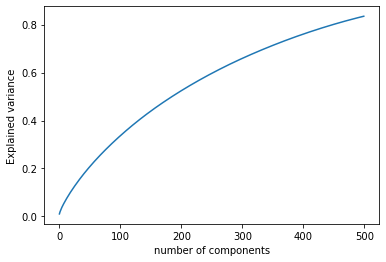

In [335]:
import matplotlib.pyplot as plt #comprobamos cuanta varianza recogemos con los primeros 500 componentes
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.show()

In [336]:
model = PCA(n_components=500).fit(dfmatriz)
X_pc = model.transform(dfmatriz)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = dfmatriz.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
dfwordspca = pd.DataFrame(dic.items())

In [337]:
dfwordspca #dataframe con la palabra mas releventa en cada compnenete del pca

0          1
0      PC0    million
1      PC1      start
2      PC2  technolog
3      PC3       tech
4      PC4   facebook
..     ...        ...
495  PC495      fresh
496  PC496  sitesmith
497  PC497     websit
498  PC498        war
499  PC499       game

[500 rows x 2 columns]

In [338]:
dfpca = pd.DataFrame(pca.transform(dfmatriz))

In [339]:
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 

inercias = [] #sacamos las incercias de cada modelo desde 2 a 100 clusters
  
for k in range(2,50): 
    kmeans = KMeans(k)
    kmeans.fit(dfpca)     
    inercias.append(kmeans.inertia_) 


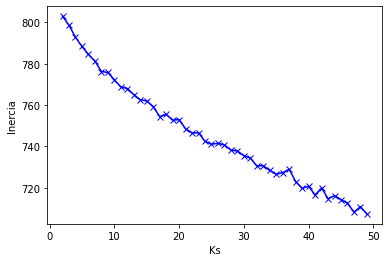

In [340]:
plt.plot(range(2,50), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [341]:
dfpca.head(5)

0         1         2         3         4         5         6    \
0 -0.044258  0.052574  0.012297 -0.059396 -0.009080 -0.112638  0.089474   
1 -0.018951 -0.030468 -0.012289 -0.010038 -0.004501 -0.022560 -0.006481   
2 -0.037922 -0.015751 -0.018951  0.022658 -0.018928  0.024694  0.026845   
3  0.005280 -0.020211  0.001394 -0.041440 -0.028376 -0.093789  0.071720   
4 -0.045666 -0.044644 -0.069476  0.027771  0.000686 -0.030532  0.019414   

        7         8         9    ...       490       491       492       493  \
0 -0.062753 -0.066100  0.035871  ... -0.027789 -0.021866  0.006332 -0.017963   
1  0.034339  0.015591  0.009402  ... -0.018211  0.012191  0.012811  0.012603   
2  0.036494  0.032480 -0.028796  ...  0.009160 -0.030183  0.024099 -0.036762   
3  0.031315 -0.051427  0.024892  ... -0.020546 -0.021638  0.000460  0.035393   
4 -0.029856  0.041176  0.071997  ...  0.029227 -0.052360  0.033122 -0.016390   

        494       495       496       497       498       499  
0  0.004571 -0.013016  0.029224 -0.013177  0.018106 -0.034874  
1 -0.012793  0.005670 -0.010372 -0.013433 -0.010191  0.007743  
2  0.030321  0.001964 -0.001544 -0.014602  0.022848 -0.002100  
3 -0.011968  0.058895 -0.016692  0.039101 -0.037039 -0.034943  
4  0.005789  0.055602 -0.016496  0.017730  0.036665 -0.019897  

[5 rows x 500 columns]

In [342]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(dfpca)
kmeans.predict(dfpca)

array([6, 6, 6, 6, 3, 6, 6, 4, 3, 6, 7, 6, 6, 6, 2, 6, 6, 6, 6, 6, 5, 4,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 1, 6, 1, 6, 6, 7, 6, 6, 4, 6,
       6, 6, 6, 4, 6, 6, 3, 3, 5, 7, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 3,
       6, 6, 4, 7, 4, 6, 6, 1, 7, 4, 4, 6, 5, 6, 7, 5, 6, 7, 6, 6, 6, 0,
       6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 5, 3, 6, 3, 6, 1, 3, 6, 6, 7, 6, 5,
       6, 6, 6, 6, 6, 3, 6, 6, 6, 3, 5, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 6,
       7, 5, 7, 7, 5, 6, 6, 6, 6, 6, 6, 7, 6, 5, 3, 6, 3, 7, 6, 6, 3, 6,
       3, 6, 6, 5, 6, 6, 6, 3, 5, 3, 6, 6, 6, 6, 6, 3, 6, 4, 6, 6, 7, 6,
       3, 6, 6, 6, 3, 6, 6, 1, 5, 6, 6, 3, 7, 6, 6, 6, 6, 2, 3, 7, 6, 7,
       6, 6, 6, 6, 5, 3, 6, 6, 1, 6, 4, 6, 1, 6, 6, 6, 6, 3, 6, 6, 3, 6,
       3, 5, 6, 4, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 7, 7, 6, 6, 3, 7, 7,
       6, 6, 6, 1, 6, 3, 6, 6, 6, 6, 6, 3, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6,
       6, 6, 1, 6, 6, 1, 6, 6, 6, 5, 3, 1, 7, 0, 3, 3, 6, 6, 6, 6, 1, 6,
       6, 6, 6, 6, 4, 3, 6, 5, 4, 1, 6, 3, 6, 6, 6,

In [383]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

silhouette_score(X, kmeans.labels_)

0.00800976028221355

In [385]:
davies_bouldin_score(X, kmeans.labels_)

6.661706963611314

In [343]:
df["Clusters kmenas"] = kmeans.labels_ #añadimos los labels al df original

In [349]:
df.head(5)

title  \
0     Ty Haney Is Doing Things Differently This Time   
1  Washington State Advances Landmark Deal on Gig...   
2              Google Suspends Advertising in Russia   
3  When Electric Cars Rule the Road, They’ll Need...   
4  A coalition of state attorneys general opens a...   

                                     title stopwords  \
0                 (Haney, Things, Differently, Time)   
1  (Washington, State, Advances, Landmark, Deal, ...   
2            (Google, Suspends, Advertising, Russia)   
3   (Electric, Cars, Rule, Road, Need, Spots, Power)   
4  (coalition, state, attorneys, general, opens, ...   

                                            abstract  \
0  The Outdoor Voices founder has a new venture t...   
1  Lawmakers have passed legislation granting ben...   
2  The move came after a Russian regulator demand...   
3  A wireless infrastructure company is betting i...   
4  The group is looking into the Chinese-owned vi...   

                                           Stopwords  \
0  Outdoor Voices founder new venture aims reward...   
1  Lawmakers passed legislation granting benefits...   
2  move came Russian regulator demanded company s...   
3  wireless infrastructure company betting figure...   
4  group looking Chinese-owned video site harms m...   

                                             Hapaxes  \
0  founder new venture aims customers blockchain-...   
1  passed legislation protections allowing Uber c...   
2  move came Russian regulator demanded stop show...   
3  wireless infrastructure betting figure chargin...   
4                      looking video site harms pose   

                                               Stema  Clusters kmenas  
0  founder new ventur aim custom blockchain-bas a...                6  
1  pass legisl protect allow uber continu driver ...                6  
2  move came russian regul demand stop show ad re...                6  
3  wireless infrastructur bet figur charg wave ne...                6  
4                          look video site harm pose                3

In [345]:
df["Clusters kmenas"].value_counts(normalize = True)

6    0.568089
3    0.100610
4    0.083333
7    0.058943
1    0.056911
2    0.055894
5    0.049797
0    0.026423
Name: Clusters kmenas, dtype: float64

In [346]:
articulo5 = [] #eliminamos las stopwords de la columan title

for i in df["title"]:
    caps = []
    x = nltk.word_tokenize(i, 'english')
    for j in x:
        if j.lower() not in stopwords and len(j) > 2:
            
            caps.append(j)
    articulo5.append(nltk.Text(caps))
    

In [347]:
df.insert(1, 'title stopwords', articulo5)#creamos la columna de title sin stopwords

In [350]:
df["title stopwords"] = df["title stopwords"].map(lambda x : ' '.join(x)) 

In [238]:
df.columns = ['title','title stopwords', 'abstract', 'Stopwords', 'Hapaxes', 'Stema', 'Clusters kmenas']
#cambiamos el orden de las columnas

In [355]:
df[df["Clusters kmenas"] == 0]["title stopwords"].sum()


'Elizabeth Holmes Ex-Boyfriend Hopes Escape VerdictElizabeth Holmes set sentenced Sept.mistrial declared three counts Elizabeth Holmes trialSilicon Valley Escape Elizabeth HolmesJurors set deliver verdict Elizabeth Holmes fraud trialhappens next Elizabeth HolmesElizabeth Holmes found guilty four counts fraudJurors End Fourth Day Deliberations Elizabeth Holmes TrialVerdict Elizabeth Holmes Trial MakeoverClosing Arguments Begin Trial Elizabeth HolmesElizabeth Holmes caps testimony round denialsProsecutors Push Elizabeth Holmes Theranos Take ResponsibilityElizabeth Holmes Says Former Boyfriend AbusedElizabeth Holmes Testimony Holmes Concludes Time StandElizabeth Holmes Points Fingers Others Says Believerknow Sunny BalwaniElizabeth Holmes trial means Silicon ValleyElizabeth Holmes following common playbook defense lawyers sayElizabeth Holmes Hones Defense Day TestimonyMs. Holmes begins rebutting one prosecution key argumentsconstant support Billy Evans Elizabeth Holmes partnerprosecution k

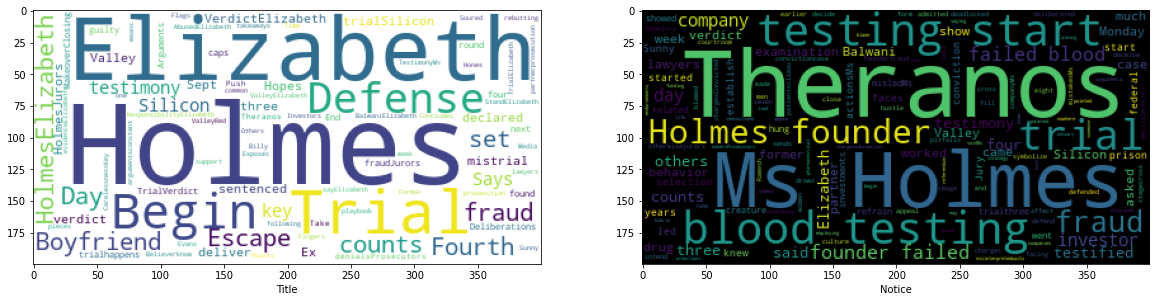

In [375]:
#noticias sobre elizabeth holmes y el escandolo e theranos
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 0]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 0]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 0]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 0]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

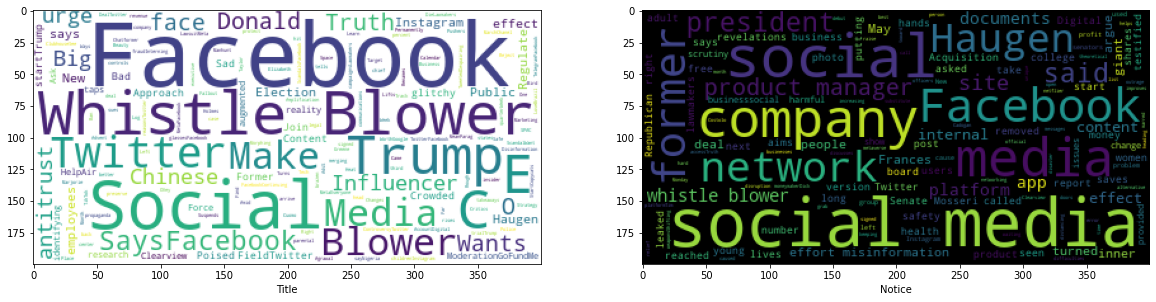

In [376]:
#redes soliciales
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 1]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 1]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 1]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 1]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

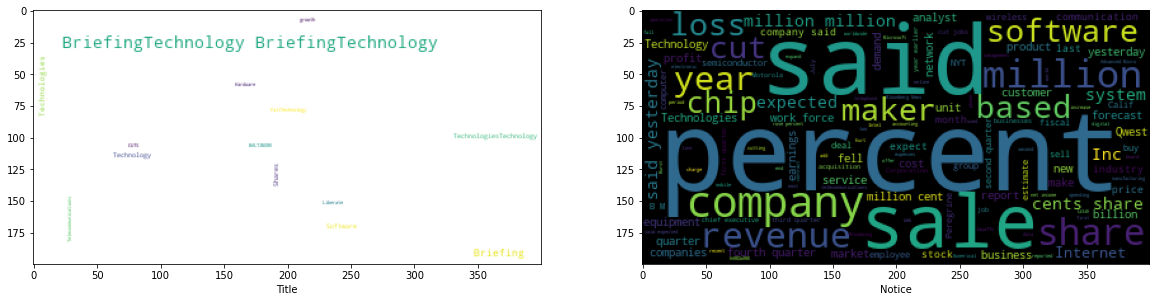

In [377]:
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 2]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 2]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 2]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 2]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

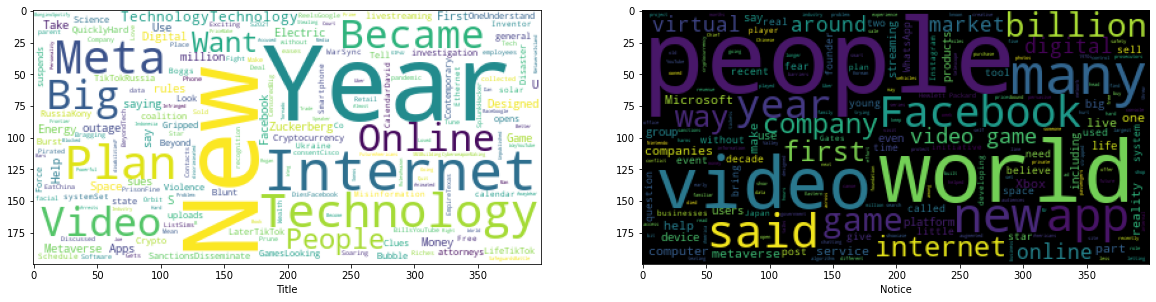

In [378]:
#noticias sobre año nuevo
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 3]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 3]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 3]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 3]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

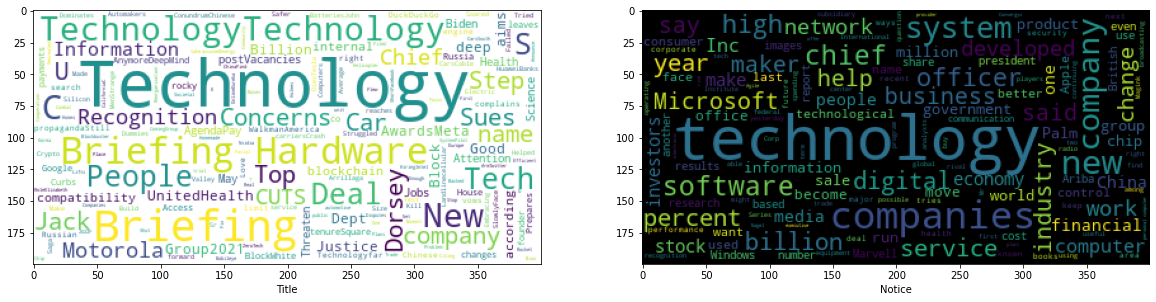

In [379]:
#noticias generales sobre tecnología
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 4]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 4]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 4]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 4]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

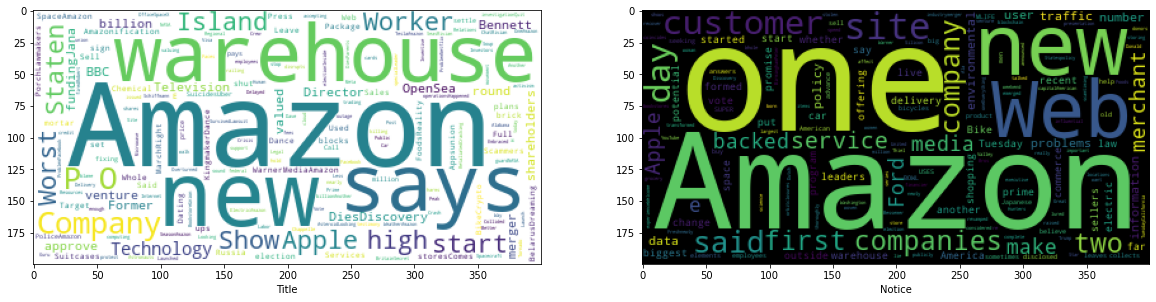

In [380]:
#noticias que contienen cosas cobrea amazon
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 5]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 5]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 5]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 5]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

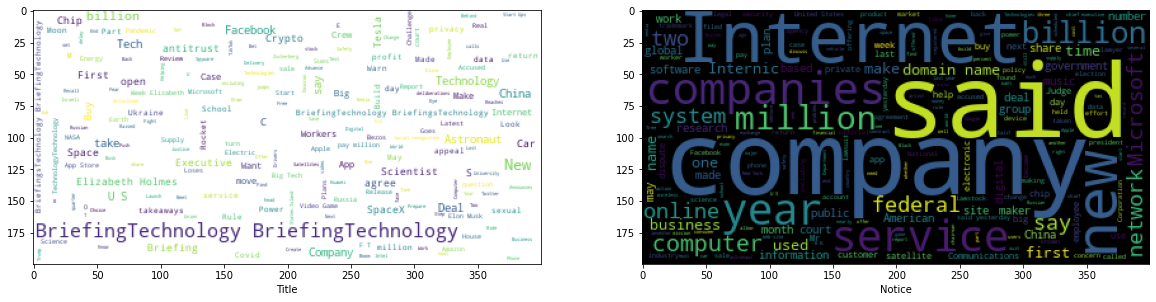

In [381]:
#noticias generales sobre internet y compañías
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 6]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 6]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 6]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 6]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

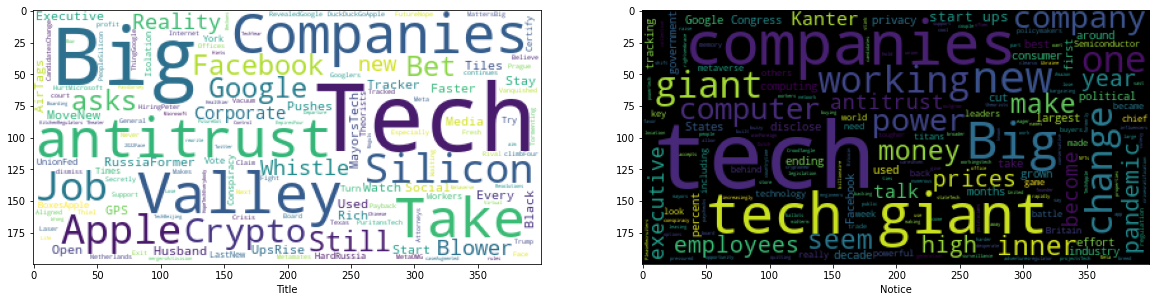

In [382]:
#habla sobre grnades compañías, sillicon valley, gigantes...
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmenas"] == 7]['title stopwords'].sum()))
title.generate(df[df["Clusters kmenas"] == 7]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmenas"] == 7]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmenas"] == 7]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

In [367]:
df.tail(10)
#hay muchos títulos repetidos 

title      title stopwords  \
1189  Technology Briefing  Technology Briefing   
1191  Technology Briefing  Technology Briefing   
1192  Technology Briefing  Technology Briefing   
1193  Technology Briefing  Technology Briefing   
1194  Technology Briefing  Technology Briefing   
1195  Technology Briefing  Technology Briefing   
1196  Technology Briefing  Technology Briefing   
1197  Technology Briefing  Technology Briefing   
1198  Technology Briefing  Technology Briefing   
1199  Technology Briefing  Technology Briefing   

                                               abstract  \
1189  HARDWARE ADVANCED MICRO ISSUES WARNING Advance...   
1191  INTERNET`MLIFE' DRAWS SUPER BOWL TRAFFIC The a...   
1192  HARDWARESOLECTRON BUYING C-MAC FOR $2.7 BILLIO...   
1193  INTERNET ORIGINAL `INCUBATOR' PULLING PLUG Ide...   
1194  HARDWAREA HEWLETT DIRECTOR IS CRITICIZED In a ...   
1195  PEOPLEAT&T EXECUTIVE JOINS PALM Palm Inc. has ...   
1196  INTERNET CNET WARNS OF LOWER SALES The online ...   
1197  INTERNET SEARCH PROVIDER FOR NBCI AND EXPLORER...   
1198  TELECOMMUNICATIONSNOKIA TO BUY AMBER NETWORKS ...   
1199  INTERNET RETRENCHMENT AT CMGI CMGI , the once-...   

                                              Stopwords  \
1189  HARDWARE ADVANCED MICRO ISSUES WARNING Advance...   
1191  INTERNET MLIFE DRAWS SUPER BOWL TRAFFIC annual...   
1192  HARDWARESOLECTRON BUYING C-MAC 2.7 BILLION C-M...   
1193  INTERNET ORIGINAL INCUBATOR PULLING PLUG Ideal...   
1194  HARDWAREA HEWLETT DIRECTOR CRITICIZED letter s...   
1195  PEOPLEAT EXECUTIVE JOINS PALM Palm Inc. appoin...   
1196  INTERNET CNET WARNS LOWER SALES online infor- ...   
1197  INTERNET SEARCH PROVIDER NBCI EXPLORER GoTo.co...   
1198  TELECOMMUNICATIONSNOKIA BUY AMBER NETWORKS Nok...   
1199  INTERNET RETRENCHMENT CMGI CMGI once-highflyin...   

                                                Hapaxes  \
1189  HARDWARE ADVANCED MICRO ISSUES WARNING Advance...   
1191  INTERNET annual analysis Jupiter site surround...   
1192  HARDWARESOLECTRON BUYING C-MAC 2.7 BILLION C-M...   
1193  INTERNET Idealab prominent Internet businesses...   
1194  HARDWAREA letter shareholders executives Hewle...   
1195  PEOPLEAT JOINS PALM Palm Inc. appointed David ...   
1196  INTERNET SALES first-quarter revenue would exp...   
1197  INTERNET Internet announced signed agreement r...   
1198  TELECOMMUNICATIONSNOKIA big cellular maker agr...   
1199  INTERNET CMGI CMGI Internet investment holding...   

                                                  Stema  Clusters kmenas  
1189  hardwar advanc micro issu warn advanc micro de...                2  
1191  internet annual analysi jupit site surround sh...                5  
1192  hardwaresolectron buy c-mac  .  billion c-mac ...                2  
1193  internet idealab promin internet busi silicon ...                6  
1194  hardwarea letter sharehold execut hewlett-pack...                6  
1195  peopleat join palm palm inc. appoint david nag...                4  
1196  internet sale first-quart revenu would expect ...                2  
1197  internet internet announc sign agreement renew...                6  
1198  telecommunicationsnokia big cellular maker agr...                6  
1199  internet cmgi cmgi internet invest hold told i...                2

## CLUSTERING 1 | KNN, K=6

In [395]:
#como los resultados son malos y hay algunos clsuters muy genéricos ya que todas las noticias son sobre technología vamos a probar con menos

kmeans = KMeans(n_clusters = 6)
kmeans.fit(dfpca)
kmeans.predict(dfpca)

array([4, 4, 4, 4, 4, 4, 1, 5, 4, 4, 2, 1, 1, 1, 3, 4, 4, 4, 4, 1, 4, 5,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 0, 4, 0, 4, 1, 1, 4, 4, 5, 4,
       4, 4, 4, 5, 4, 4, 4, 4, 4, 2, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 2, 5, 4, 4, 0, 2, 5, 5, 4, 4, 4, 2, 1, 4, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 5, 4, 4, 4, 0, 4, 0, 1, 4, 4, 2, 4, 1,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 5, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1, 1, 4, 5, 2, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 1, 4, 4, 4, 1, 4, 4, 5, 4, 5, 4, 4, 2, 0,
       5, 4, 4, 4, 5, 4, 4, 0, 1, 4, 4, 4, 2, 4, 1, 4, 4, 3, 0, 2, 4, 2,
       4, 1, 4, 4, 4, 5, 4, 4, 0, 4, 5, 4, 0, 4, 4, 4, 4, 4, 3, 4, 4, 0,
       4, 1, 4, 5, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 2, 2,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 0, 0, 4, 4, 4,
       4, 4, 0, 4, 4, 0, 4, 4, 4, 1, 4, 0, 2, 4, 4, 4, 4, 4, 4, 4, 0, 4,
       4, 4, 4, 4, 5, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4,

In [396]:
df["Clusters kmeans5"] = kmeans.labels_ #añadimos los labels al df original

In [397]:
df["Clusters kmeans5"].value_counts(normalize = True) #vemos el tamaño de cada cluster

4    0.620935
5    0.100610
3    0.074187
0    0.074187
1    0.071138
2    0.058943
Name: Clusters kmeans5, dtype: float64

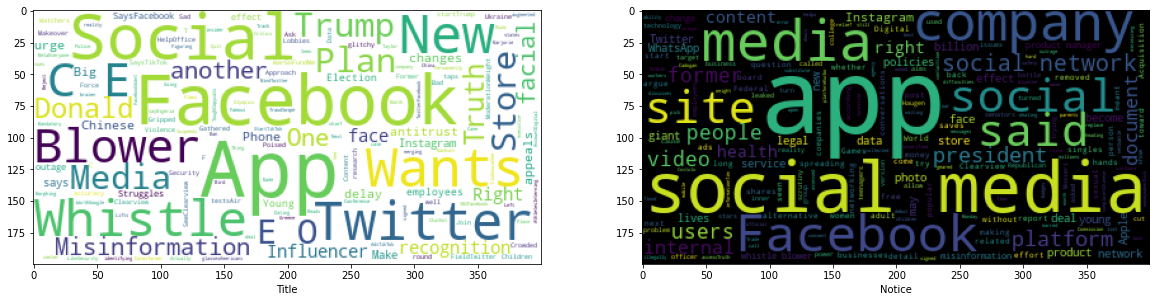

In [398]:
#
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmeans5"] == 0]['title stopwords'].sum()))
title.generate(df[df["Clusters kmeans5"] == 0]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmeans5"] == 0]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmeans5"] == 0]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

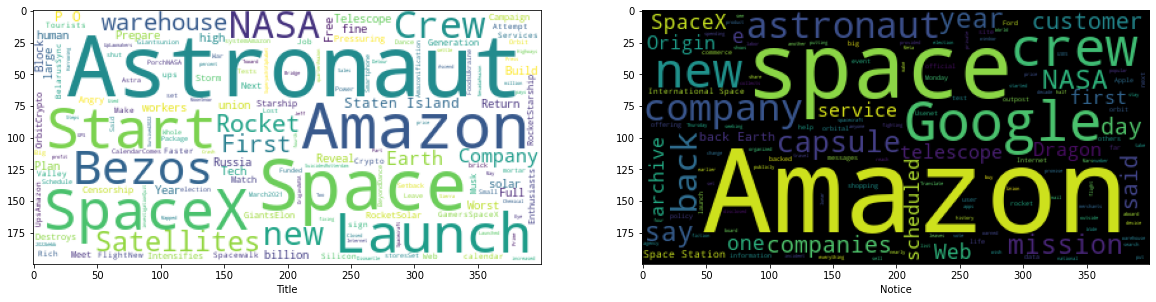

In [399]:
#noticias sobre amazon, jeff bezos y spacex
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmeans5"] == 1]['title stopwords'].sum()))
title.generate(df[df["Clusters kmeans5"] == 1]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmeans5"] == 1]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmeans5"] == 1]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

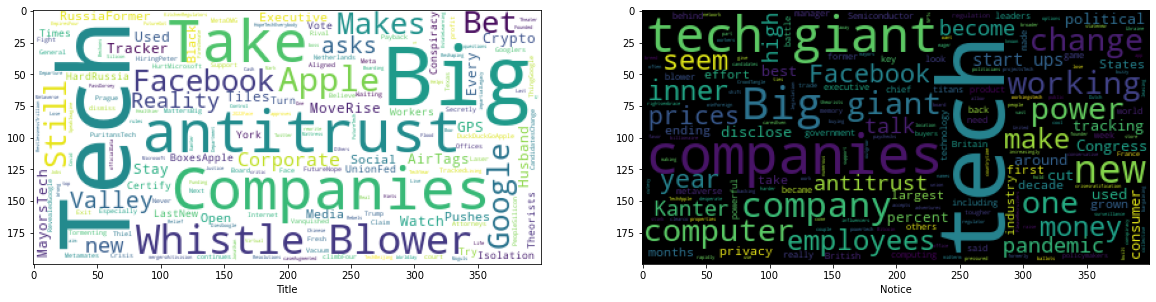

In [400]:
#noticias sobre elizabeth holmes y el escandolo e theranos
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmeans5"] == 2]['title stopwords'].sum()))
title.generate(df[df["Clusters kmeans5"] == 2]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmeans5"] == 2]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmeans5"] == 2]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

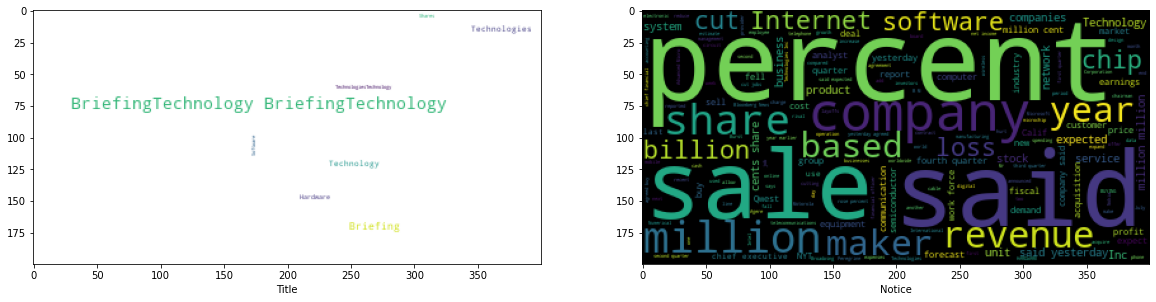

In [401]:
#noticias sobre elizabeth holmes y el escandolo e theranos
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmeans5"] == 3]['title stopwords'].sum()))
title.generate(df[df["Clusters kmeans5"] == 3]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmeans5"] == 3]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmeans5"] == 3]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

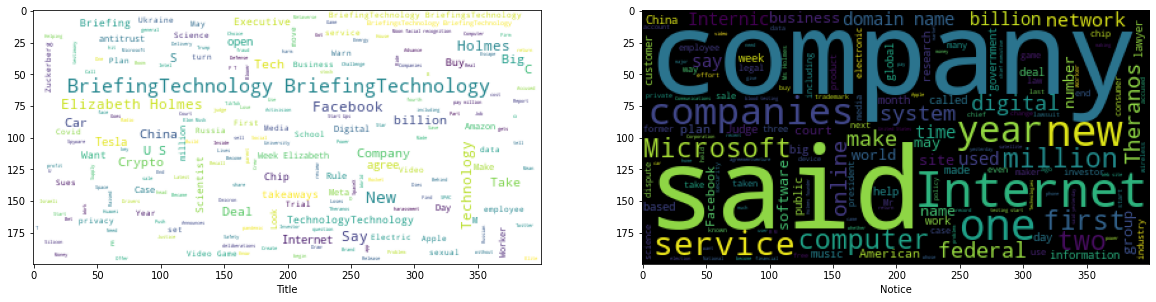

In [402]:
#noticias sobre elizabeth holmes y el escandolo e theranos
title = WordCloud(background_color='white', max_words=len(df[df["Clusters kmeans5"] == 4]['title stopwords'].sum()))
title.generate(df[df["Clusters kmeans5"] == 4]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(df[df["Clusters kmeans5"] == 4]['Stopwords'].sum()))
notice.generate(df[df["Clusters kmeans5"] == 4]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

# CLUSTERING 3 | SIN TÍTULOS DUPLICADOS

In [407]:
#probamos sin las noticias que tienen en el titulo duplicado
dfduplicados = df.drop_duplicates(subset = 'title stopwords')
dfduplicados.shape

(870, 8)

In [412]:
df["Clusters kmeans5"].value_counts(normalize = True)

4    0.620935
5    0.100610
3    0.074187
0    0.074187
1    0.071138
2    0.058943
Name: Clusters kmeans5, dtype: float64

In [410]:
dfduplicados["Clusters kmeans5"].value_counts(normalize = True)

4    0.631034
5    0.108046
0    0.083908
1    0.078161
2    0.066667
3    0.032184
Name: Clusters kmeans5, dtype: float64

In [413]:
df["Clusters kmenas"].value_counts(normalize = True)

6    0.568089
3    0.100610
4    0.083333
7    0.058943
1    0.056911
2    0.055894
5    0.049797
0    0.026423
Name: Clusters kmenas, dtype: float64

In [411]:
dfduplicados["Clusters kmenas"].value_counts(normalize = True)

6    0.566667
3    0.111494
4    0.086207
7    0.066667
1    0.064368
5    0.052874
0    0.029885
2    0.021839
Name: Clusters kmenas, dtype: float64

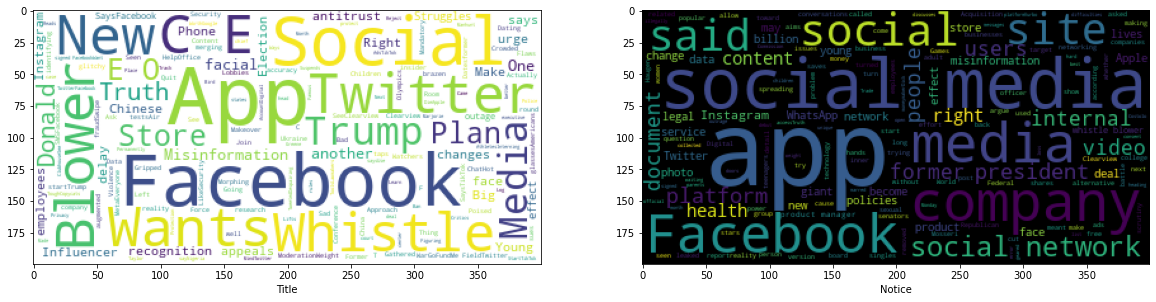

In [415]:
#redes sociales
title = WordCloud(background_color='white', max_words=len(dfduplicados[dfduplicados["Clusters kmeans5"] == 0]['title stopwords'].sum()))
title.generate(dfduplicados[dfduplicados["Clusters kmeans5"] == 0]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(dfduplicados[dfduplicados["Clusters kmeans5"] == 0]['Stopwords'].sum()))
notice.generate(dfduplicados[dfduplicados["Clusters kmeans5"] == 0]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

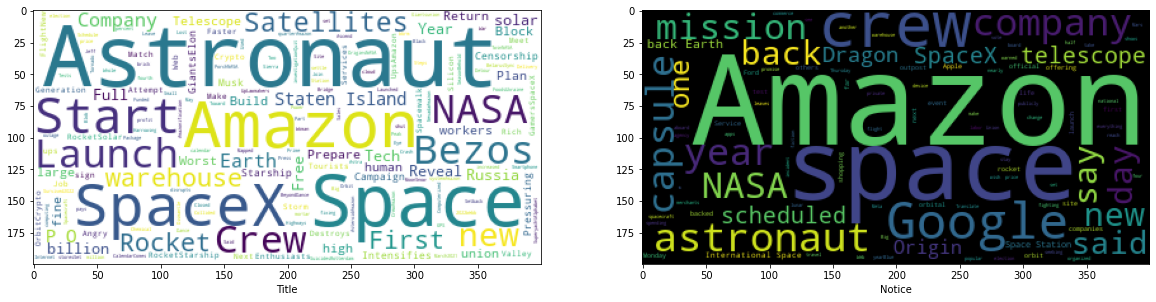

In [416]:
#amazon, bezos spacex
title = WordCloud(background_color='white', max_words=len(dfduplicados[dfduplicados["Clusters kmeans5"] == 1]['title stopwords'].sum()))
title.generate(dfduplicados[dfduplicados["Clusters kmeans5"] == 1]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(dfduplicados[dfduplicados["Clusters kmeans5"] == 1]['Stopwords'].sum()))
notice.generate(dfduplicados[dfduplicados["Clusters kmeans5"] == 1]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

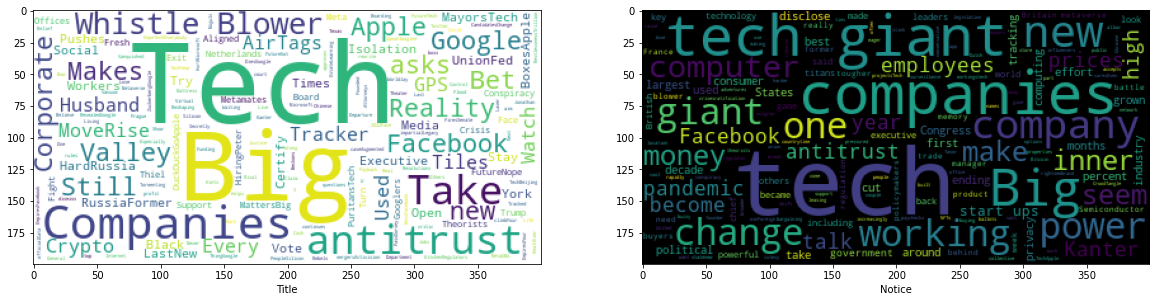

In [417]:
#grandes compañías
title = WordCloud(background_color='white', max_words=len(dfduplicados[dfduplicados["Clusters kmeans5"] == 2]['title stopwords'].sum()))
title.generate(dfduplicados[dfduplicados["Clusters kmeans5"] == 2]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(dfduplicados[dfduplicados["Clusters kmeans5"] == 2]['Stopwords'].sum()))
notice.generate(dfduplicados[dfduplicados["Clusters kmeans5"] == 2]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

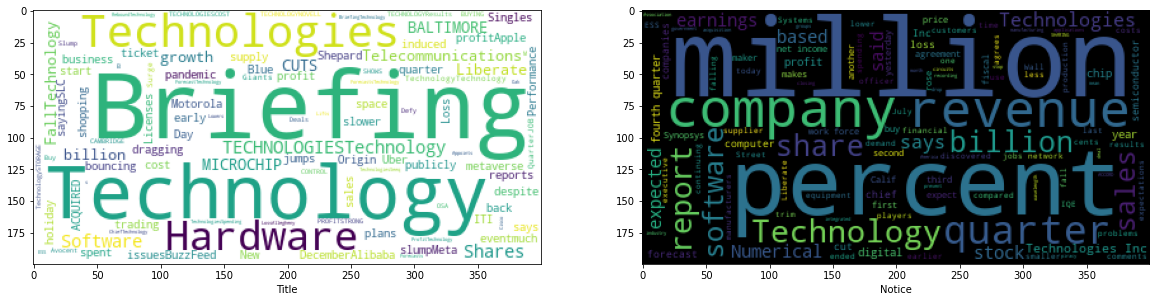

In [418]:
#beneficios de las compañías
title = WordCloud(background_color='white', max_words=len(dfduplicados[dfduplicados["Clusters kmeans5"] == 3]['title stopwords'].sum()))
title.generate(dfduplicados[dfduplicados["Clusters kmeans5"] == 3]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(dfduplicados[dfduplicados["Clusters kmeans5"] == 3]['Stopwords'].sum()))
notice.generate(dfduplicados[dfduplicados["Clusters kmeans5"] == 3]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

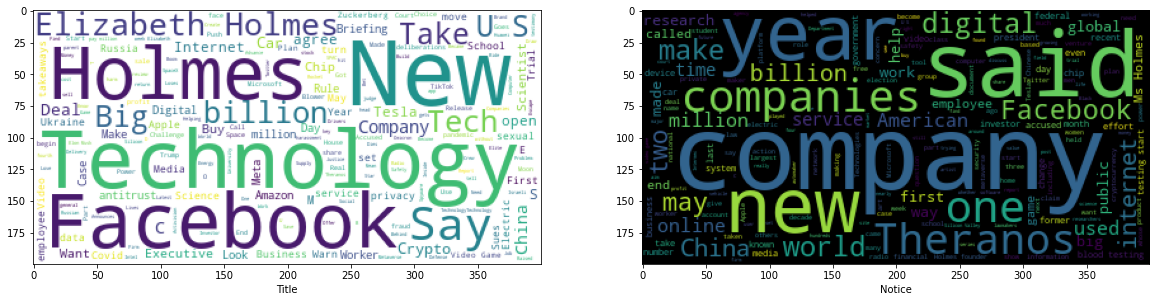

In [419]:
#homes theranos y facebook (escandalos?)
title = WordCloud(background_color='white', max_words=len(dfduplicados[dfduplicados["Clusters kmeans5"] == 4]['title stopwords'].sum()))
title.generate(dfduplicados[dfduplicados["Clusters kmeans5"] == 4]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(dfduplicados[dfduplicados["Clusters kmeans5"] == 4]['Stopwords'].sum()))
notice.generate(dfduplicados[dfduplicados["Clusters kmeans5"] == 4]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

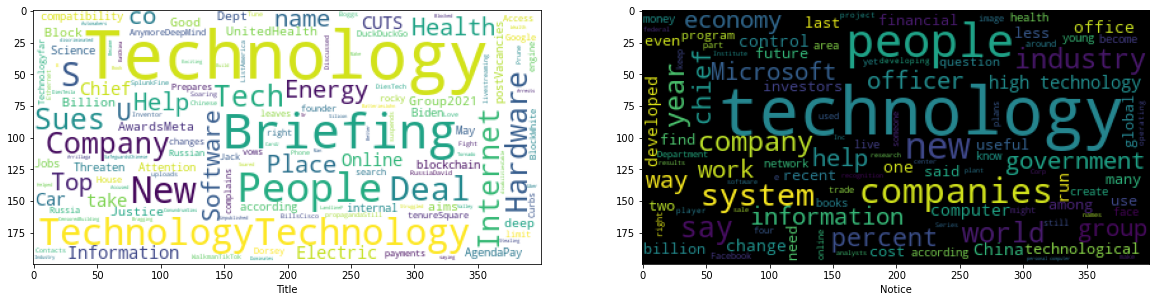

In [421]:
#homes theranos y facebook (escandalos?)
title = WordCloud(background_color='white', max_words=len(dfduplicados[dfduplicados["Clusters kmeans5"] == 5]['title stopwords'].sum()))
title.generate(dfduplicados[dfduplicados["Clusters kmeans5"] == 5]['title stopwords'].sum())

notice = WordCloud(background_color='black', max_words=len(dfduplicados[dfduplicados["Clusters kmeans5"] == 5]['Stopwords'].sum()))
notice.generate(dfduplicados[dfduplicados["Clusters kmeans5"] == 5]['Stopwords'].sum())

fig, ax = plt.subplots(ncols=2,figsize=(20,10))

ax[0].imshow(title)
ax[0].set_xlabel("Title")
ax[1].imshow(notice)
ax[1].set_xlabel("Notice")
plt.show()

# CONCLUSIONES

· Todas las noticias son de temas muy similares, por lo tanto el a la hora de realizar el clustering surgen dificultades. Aun así es capaz de aislar temas que se salen salen de lo habitual.

· Usando un PCA de 500 componentes y probando kmeans con diferente número de centroides el resultado siempre nos da un cluster con el 50/60% de los documentos agrupando noticias de temas menos concretos. El resto de agrupaciones si que tiene temáticas mas marcadas, redes sociales, amazon, theranos, silicon valley...

· Por una parte los clusters están muy juntos entre ellos, pero es verdad que todas las noticias tratan sobre lo mismo. Por otra parte si que ha sido capaz de diferenciar algunos temáticas como redes sociales.
